<a href="https://colab.research.google.com/github/oatthegreat/quiz4/blob/main/yudavaRoopnarineLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<h1>Introduction</h1>
<p>The problems with the mortgage loan application is wether or not we can predict if the mortgage will be denied. The approach i will use is to use binary logistic regression models to compare and contrast a series</p>

# Data

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


#retrieving my data
df = pd.read_csv('https://raw.githubusercontent.com/oatthegreat/quiz4/main/HDMA%20Boston%20Housing%20Data.csv')

#replacing ? with NAN
df.replace('?', np.nan, inplace = True)
df.replace(0, np.nan, inplace = True)

#printing the data
print(df.shape)
print(df.head())

(2381, 14)
   Unnamed: 0    dir    hir       lvr  ccs  mcs pbcr dmi self single  uria  \
0           1  0.221  0.221  0.800000  5.0  2.0   no  no   no     no   3.9   
1           2  0.265  0.265  0.921875  2.0  2.0   no  no   no    yes   3.2   
2           3  0.372  0.248  0.920398  1.0  2.0   no  no   no     no   3.2   
3           4  0.320  0.250  0.860465  1.0  2.0   no  no   no     no   4.3   
4           5  0.360  0.350  0.600000  1.0  1.0   no  no   no     no   3.2   

   comdominiom black deny  
0          NaN    no   no  
1          NaN    no   no  
2          NaN    no   no  
3          NaN    no   no  
4          NaN    no   no  


In [175]:

# Instantiate the encoders
encoders = {column: preprocessing.LabelEncoder() for column in df}

for column in df:
    df[column] = encoders[column].fit_transform(df[column])


# Exploratory Data Analysis

<h1>EDA</h1>

<ol>
  <h3>Attributes in Mortgage</h3>

  <li>dir is the debt payments to total income ratio</li>

  <li>hir is the housing expenses to income ratio</li>

  <li>lvr si the ratio of size of loan to assessed value of property</li>

  <li>ccs is the consumer credit score from 1 to 6 (a low value being a good score)</li>

  <li>mcs is the mortgage credit score from 1 to 4 (a low value being a good score)</li>

  <li>pbcr is the public bad credit record ?</li>

  <li>dmi is the denied mortgage insurance ?</li>

  <li>self is asking for self employed ?</li>

  <li>single is if the applicant single ?</li>

  <li>uria is the 1989 Massachusetts unemployment rate in the applicant's industry</li>

  <li>condominium is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)</li>

  <li>black is if the applicant black? </li>

  <li>deny if the mortgage application denied </li>                                  
</ol>

<h1>Graphs that describe our data</h1>

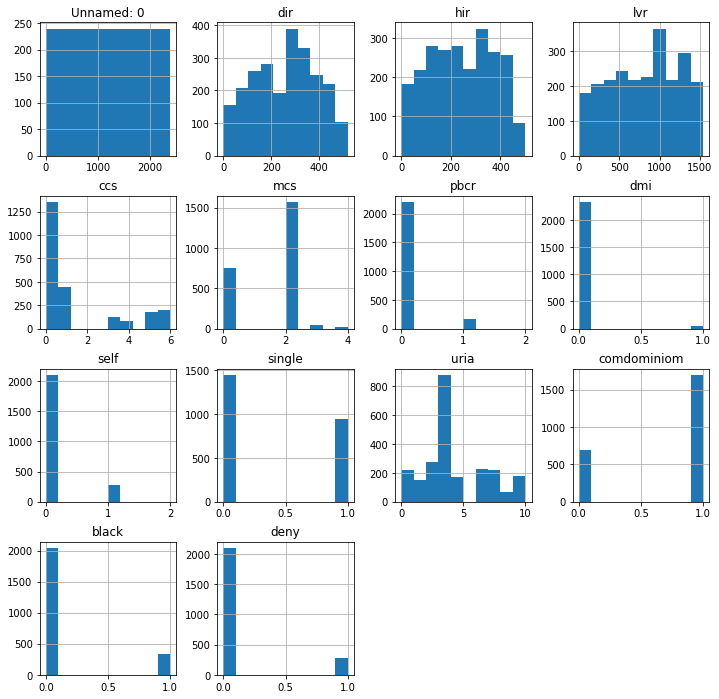

In [176]:
Gphs = df.hist(figsize=(12,12))

# Data Preparation

<p>First we find if any are null then we used the dropna function to replace the 0"s and the fillna method to fill the NAN'S</p>

In [ ]:
#checking if its null
df.isnull().sum()

In [ ]:
#Drop values with 0
df_drop_example = df.copy()
df_drop_example.dropna(axis = 0, inplace = True)
print(df_drop_example)

In [ ]:
#we will also use fillna prev values to fill the nans
df_fill = df.copy()
df_fill.fillna(method='pad', limit=1,inplace=True)
print(df_fill)

In [ ]:
#fill empty values with bfill
df_fill1 = df.copy()
df_fill1.fillna(method='bfill', inplace=True)
print(df_fill1)

# Prepped Data Review

<p>We now show the graphs on the new information and has found there is no real differnce in the data set</p>

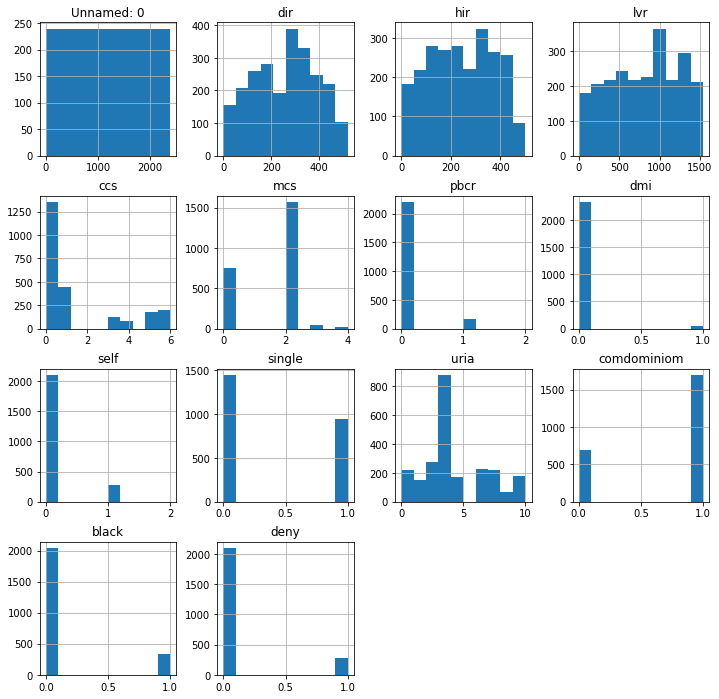

In [183]:
Gphs = df_statfill.hist(figsize=(12,12))

# Regression Modeling

<h1>Test 1</h1>

In [ ]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


#use dmatrices to use for our data
y, X = dmatrices('dir ~ dmi + hir + lvr + \
                  self + single + C(ccs) + C(mcs)',
                  df, return_type="dataframe")
print(X.columns)

In [188]:
# fix column names of X
X = X.rename(columns = {'C(ccs)[T.1.0]':'ccs_1',
                        'C(ccs)[T.2.0]':'ccs_2',
                        'C(ccs)[T.3.0]':'ccs_3',
                        'C(ccs)[T.4.0]':'ccs_4',
                        'C(ccs)[T.5.0]':'ccs_5',
                        'C(ccs)[T.6.0]':'ccs_6',
                        'C(mcs)[T.1.0]':'mcs1',
                        'C(mcs)[T.2.0]':'mcs2',
                        'C(mcs)[T.3.0]':'mcs3',
                        'C(mcs)[T.4.0]':'mcs4'})

In [189]:
# flatten y into a 1-D array
y = np.ravel(y)

In [ ]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

<p>I used dir as my itteration while comparing dmi + hir + lvr + over self + single + C(ccs) + C(mcs)' The model makes sense because 50% is one of the ranges we can see in our graphs</p>

<h1>Test 2</h1>

In [217]:
#use dmatrices to use for our data in our 2nd set
p, q = dmatrices('hir ~ pbcr + single + \
                  black + deny + C(ccs) + C(mcs)',
                  df, return_type="dataframe")
print(q.columns)

Index(['Intercept', 'C(ccs)[T.1]', 'C(ccs)[T.2]', 'C(ccs)[T.3]', 'C(ccs)[T.4]',
       'C(ccs)[T.5]', 'C(ccs)[T.6]', 'C(mcs)[T.1]', 'C(mcs)[T.2]',
       'C(mcs)[T.3]', 'C(mcs)[T.4]', 'pbcr', 'single', 'black', 'deny'],
      dtype='object')


In [202]:
# fix column names of X
q = q.rename(columns = {'C(ccs)[T.1.0]':'ccs_1',
                        'C(ccs)[T.2.0]':'ccs_2',
                        'C(ccs)[T.3.0]':'ccs_3',
                        'C(ccs)[T.4.0]':'ccs_4',
                        'C(ccs)[T.5.0]':'ccs_5',
                        'C(ccs)[T.6.0]':'ccs_6',
                        'C(mcs)[T.1.0]':'mcs1',
                        'C(mcs)[T.2.0]':'mcs2',
                        'C(mcs)[T.3.0]':'mcs3',
                        'C(mcs)[T.4.0]':'mcs4'})

In [203]:
# flatten y into a 1-D array
p = np.ravel(p)

In [218]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(q, p)

# check the accuracy on the training set
model.score(q, p)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.0755984880302394

<p>I used hir as my itteration while comparing pbcr + single + over black + deny + C(ccs) + C(mcs) The model does not makes sense because 75% is not what we can see in our graphs</p>

<h1>Test 3</h2>

In [219]:
#use dmatrices to use for our data in our 3rd set
s, t = dmatrices('deny ~ pbcr + single + \
                  uria  + C(ccs) + C(mcs)',
                  df, return_type="dataframe")
print(q.columns)

Index(['Intercept', 'C(ccs)[T.1]', 'C(ccs)[T.2]', 'C(ccs)[T.3]', 'C(ccs)[T.4]',
       'C(ccs)[T.5]', 'C(ccs)[T.6]', 'C(mcs)[T.1]', 'C(mcs)[T.2]',
       'C(mcs)[T.3]', 'C(mcs)[T.4]', 'pbcr', 'single', 'black', 'deny'],
      dtype='object')


In [212]:
# fix column names of X
t = t.rename(columns = {'C(ccs)[T.1.0]':'ccs_1',
                        'C(ccs)[T.2.0]':'ccs_2',
                        'C(ccs)[T.3.0]':'ccs_3',
                        'C(ccs)[T.4.0]':'ccs_4',
                        'C(ccs)[T.5.0]':'ccs_5',
                        'C(ccs)[T.6.0]':'ccs_6',
                        'C(mcs)[T.1.0]':'mcs1',
                        'C(mcs)[T.2.0]':'mcs2',
                        'C(mcs)[T.3.0]':'mcs3',
                        'C(mcs)[T.4.0]':'mcs4'})

In [213]:
# flatten y into a 1-D array
s = np.ravel(s)

In [220]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(t, s)

# check the accuracy on the training set
model.score(t, s)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8866022679546409

<p>I used deny as my itteration while comparing pbcr + single over uria  + C(ccs) + C(mcs)' The model does makes sense because 88% is what we can see in our graphs</p>

# Select Models 

<p>I used dir hir and deny for my model selection criteria. I perferd the dir because it was one that was really close with the graphs. </p>

<p></p>

<p></p>

#Conclusion

<p>In conclusion, there was not allot 0's so we needed to changesthat in the datato create a more accurate results. Once the gaps were filled we then used regression models to see how we can iterate our data and see how it campares.We also used our domain knowledge to familirze our selves with the data to understand our data.</p>